In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Populating the interactive namespace from numpy and matplotlib


In [ ]:
DIRECTORY = r'/content/drive/MyDrive/archive'
# a raw string(r'...') is used to treat backslash(\) as a normal character
CATEGORIES = ['mammooty','mohanlal']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


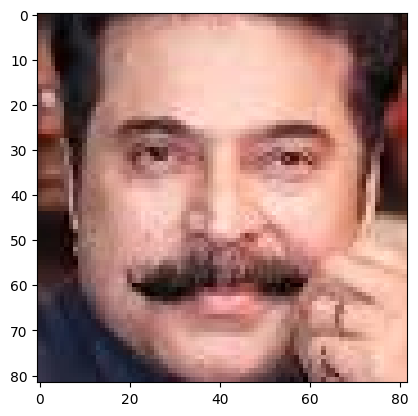

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/archive/training set/mammooty/mammooty126.png')
imgplot=plt.imshow(img)
plt.show()

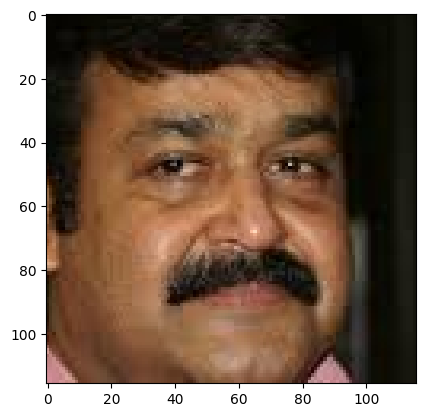

In [ ]:
img=mpimg.imread('/content/drive/MyDrive/archive/training set/mohanlal/mohanlal155.png')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D


In [ ]:
tensorflow.__version__

'2.13.0'

In [ ]:
img_height, img_width = 150, 150
training_data_directory = r"/content/drive/MyDrive/archive/training set"
validation_data_directory = r"/content/drive/MyDrive/archive/test set"
epochs = 20
batch_size=20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=="channel first":
  input_shape=(3,img_width, img_height)
else:
  input_shape=(img_width, img_height, 3)

In [ ]:
train_data_gen=ImageDataGenerator(rescale=1/225, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
#rescale test also
test_data_gen=ImageDataGenerator(rescale=1/225)
train_generator=train_data_gen.flow_from_directory(training_data_directory, target_size=(img_width, img_height),batch_size=batch_size, class_mode="binary", classes=["mammooty","mohanlal"])
validation_generator=test_data_gen.flow_from_directory(validation_data_directory, target_size=(img_width, img_height),batch_size=batch_size, class_mode="binary")

Found 995 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


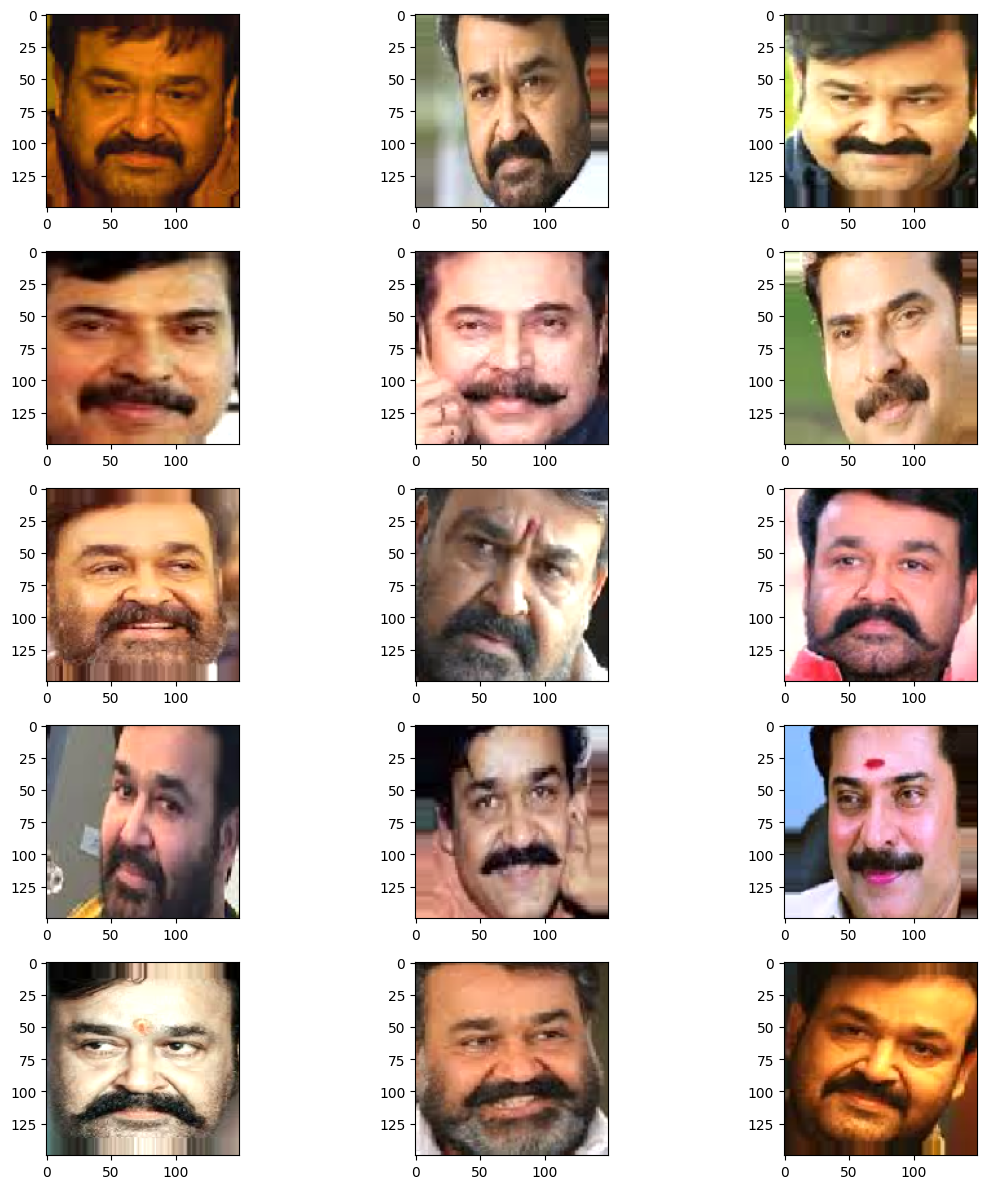

In [ ]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch, y_batch in train_generator:
    image=x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=input_shape) )
#this step helps to add a cnn to extract features from the data

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2))) #maxpooling helps reduce size of data

model.add(Flatten()) #to convert multidimensional array to 1D
model.add(Dense(64)) #64 neurons with 3*3 filter

model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                     

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 350464)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                22429760  
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                     

In [ ]:
training=model.fit_generator(train_generator, steps_per_epoch=25, epochs=epochs, validation_data=validation_generator, validation_steps=100)

<ipython-input-33-5dfc1d55e72b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training=model.fit_generator(train_generator, steps_per_epoch=25, epochs=epochs, validation_data=validation_generator, validation_steps=100)


Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.6400 - accuracy: 0.7636

25/25 [==============================] - 24s 951ms/step - loss: 0.6400 - accuracy: 0.7636 - val_loss: 0.4269 - val_accuracy: 0.8667
Epoch 2/20
25/25 [==============================] - 24s 930ms/step - loss: 0.4785 - accuracy: 0.8162
Epoch 3/20
25/25 [==============================] - 23s 896ms/step - loss: 0.3854 - accuracy: 0.8242
Epoch 4/20
25/25 [==============================] - 24s 907ms/step - loss: 0.3104 - accuracy: 0.8760
Epoch 5/20
25/25 [==============================] - 25s 1000ms/step - loss: 0.3463 - accuracy: 0.8640
Epoch 6/20
25/25 [==============================] - 23s 906ms/step - loss: 0.3242 - accuracy: 0.9040
Epoch 7/20
25/25 [==============================] - 26s 1s/step - loss: 0.2688 - accuracy: 0.9030
Epoch 8/20
25/25 [==============================] - 24s 937ms/step - loss: 0.2201 - accuracy: 0.9152
Epoch 9/20
25/25 [==============================] - 24s 935ms/step - loss: 0.2135 - accuracy: 0.9200
Epoch 10/20
25/25 [==============================] - 24s 969ms

In [ ]:
print(training.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
'''plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()'''


"plt.plot(training.history['accuracy'])\nplt.plot(training.history['val_accuracy'])\nplt.title('model accuracy')\nplt.xlabel('epochs')\nplt.ylabel('accuracy')\nplt.legend(['train','test'],loc='upper left')\nplt.show()"

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
image_predict=image.load_img("/content/drive/MyDrive/dataset - Copy/mohanlal11.jpg", target_size=(150,150))

image_predict=image.img_to_array(image_predict)
image_predict=np.expand_dims(image_predict, axis=0)

result=model.predict(image_predict)
print(result)
if result[0][0]==1:
  prediction='mohanlal'
else:
  prediction="mammooty"
print(prediction)

1/1 [==============================] - 0s 97ms/step
[[1.]]
mohanlal
